#**Desafío 4: LDA y QDA**

##Francisca Pinto González
###10 de octubre de 2021

##**Parte 1**

In [28]:
#----------------------------Google Colab---------------------------------------

!pip install ipython-autotime

#------------------------------Biblioteca---------------------------------------
#tiempo de ejecución
%load_ext autotime

#dataframe y arrays
import pandas as pd
import numpy as np

#estadística
import scipy.stats as stats

#gráficos
import matplotlib.pyplot as plt
import seaborn as sns

#gama matplotlib para facilitar escritura de código
%matplotlib inline

#entrenamiento
from sklearn.model_selection import train_test_split

#sklearn resumen preprocesamiento y entrenamiento
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder, LabelBinarizer

#clasificadores
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score

#LDA y QDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

#oversampling
from imblearn.over_sampling import SMOTE

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 2.82 s (started: 2021-10-10 17:40:17 +00:00)


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
#AUX: montar archivos y carpetas desde Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
time: 2.49 ms (started: 2021-10-10 17:11:51 +00:00)


In [3]:
plt.style.use("seaborn") #tipo de gráfico, estilo

time: 5.36 ms (started: 2021-10-10 17:11:51 +00:00)


In [4]:
colab_path = "/content/drive/MyDrive/ADL/3_Intro ML/Desafío 4_LDA y QDA/default_credit.csv"
df = pd.read_csv(colab_path)
df.drop(columns = "index", inplace = True)
df.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


time: 1.22 s (started: 2021-10-10 17:11:51 +00:00)


In [5]:
df["default"].value_counts("%")

No     0.9667
Yes    0.0333
Name: default, dtype: float64

time: 22.5 ms (started: 2021-10-10 17:11:53 +00:00)


In [40]:
df.info(verbose = True,
        null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   default  10000 non-null  int64  
 1   student  10000 non-null  int64  
 2   balance  10000 non-null  float64
 3   income   10000 non-null  float64
dtypes: float64(2), int64(2)
memory usage: 312.6 KB
time: 15.4 ms (started: 2021-10-10 18:04:01 +00:00)


Comentarios:

1. No hay nulos y los tipos de dato coinciden con sus características, por lo que no es necesario pre-procesar respecto a este tema.
2. Se aplicará <code>LabelEncoder()</code> al atributo <code>Student</code> y al vector objetivo <code>Default</code>.

In [6]:
cols = ["default", "student"]
le = LabelEncoder()

df[cols] = df[cols].apply(le.fit_transform)

time: 11.4 ms (started: 2021-10-10 17:11:53 +00:00)


Comentarios:
1. Se corrobora la distribución del vector objetivo para asegurar que se mantuvo su distribución y una correcta aplicación del método <code>LabelEncoder()</code>.

In [7]:
df["default"].value_counts("%")

0    0.9667
1    0.0333
Name: default, dtype: float64

time: 7.56 ms (started: 2021-10-10 17:11:53 +00:00)


In [8]:
df #se muestra para corroborar estado actual

,default,student,balance,income
0,0,0,729.526495,44361.625074
1,0,1,817.180407,12106.134700
2,0,0,1073.549164,31767.138947
3,0,0,529.250605,35704.493935
4,0,0,785.655883,38463.495879
...,...,...,...,...
9995,0,0,711.555020,52992.378914
9996,0,0,757.962918,19660.721768
9997,0,0,845.411989,58636.156984
9998,0,0,1569.009053,36669.112365


time: 16.8 ms (started: 2021-10-10 17:11:53 +00:00)


Comentarios:

1. Se continúa graficando los atributos y aplicando <code>describe()</code>.

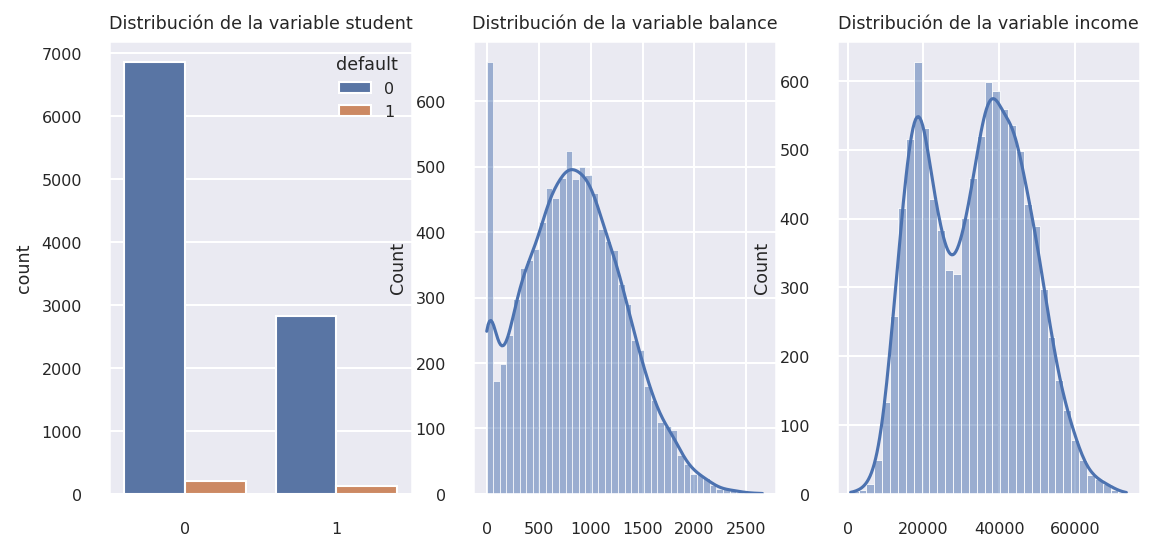

time: 1.08 s (started: 2021-10-10 17:14:53 +00:00)


In [22]:
sns.set(font_scale = 0.7) #escalar fuente para acomodar a gráfico
plt.rcParams["figure.figsize"] = (12,4) #escalar gráficos
plt.rcParams["figure.dpi"] = 150 #DPI gráficos (también modifica tamaño)
plt.tight_layout()

for n, i in enumerate(df.iloc[:, 1:4]):
  
  plt.subplot(1, 4, n+1)
  
  if len(df[i].value_counts()) > 6:
    sns.histplot(df[i], kde = True)
    plt.title(i)
    plt.xlabel("")

  else:
    ax = sns.countplot(x = df[i], hue = df["default"])

  plt.title(f"Distribución de la variable {i}")
  plt.xlabel("")

Text(0.5, 0, '')

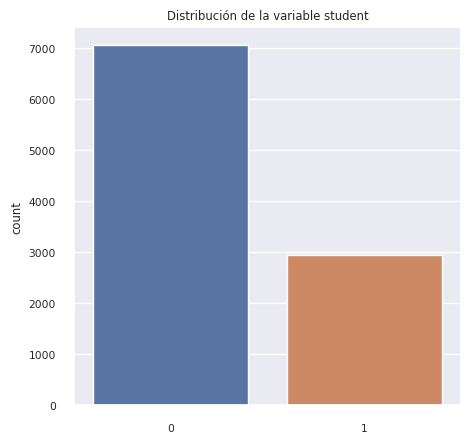

time: 198 ms (started: 2021-10-10 18:17:29 +00:00)


In [48]:
sns.set(font_scale = 0.7) #escalar fuente para acomodar a gráfico
plt.rcParams["figure.figsize"] = (5, 5) #escalar gráficos
plt.rcParams["figure.dpi"] = 100 #DPI gráficos (también modifica tamaño)
plt.tight_layout()
ax = sns.countplot(x = df["student"])

plt.title(f"Distribución de la variable student")
plt.xlabel("")

In [45]:
df.describe()

,default,student,balance,income
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.033300,0.294400,835.374886,33516.981876
std,0.179428,0.455795,483.714985,13336.639563
min,0.000000,0.000000,0.000000,771.967729
25%,0.000000,0.000000,481.731105,21340.462903
50%,0.000000,0.000000,823.636973,34552.644802
75%,0.000000,1.000000,1166.308386,43807.729272
max,1.000000,1.000000,2654.322576,73554.233495


time: 31.4 ms (started: 2021-10-10 18:12:24 +00:00)


Comentarios:

1. Se observa que la variable <code>student</code> presenta disparidad dentro de sus propias opciones (<code>0</code> y <code>1</code> representando a "no es estudiante" y "sí es estudiante"), y también hay desbalance dentro de la distribución de las clases de la variable objetivo: hay muy pocos datos en la clase <code>1</code> de <code>default</code>.
2. En el caso de <code>balance</code> la distribución se acerca a una de tipo normal, a pesar de que en montos más bajos esta situación no se cumple, ya que existe una concentración alta de personas con balance 0.
3. La variable <code>income</code> no distribuye normal, la curva del gráfico presenta un valle entre los 20.000 y 40.000 dólares.

##**Parte 2**

4. Se inicia la división de muestras para el entrenamiento de modelos.

In [10]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns = "default"),
                                                    df["default"],
                                                    test_size = 0.33,
                                                    random_state = 3748)

time: 8.31 ms (started: 2021-10-10 17:11:53 +00:00)


Comentarios:

1. Se realizará un modelo LDA sin modificar los hiperparámetros luego de aplicar estandarización (<code>StandardScaler()</code>) a la matriz de atributos (<code>X_train</code> y <code>X_test</code> separadamente).


In [49]:
lda = LinearDiscriminantAnalysis()

std = StandardScaler().fit(X_train)
X_train_scaled = std.transform(X_train)
X_test_scaled = std.transform(X_test)

lda_model = lda.fit(X_train_scaled, y_train)
yhat_lda_model = lda_model.predict(X_test_scaled)

print(classification_report(y_test, yhat_lda_model), "\n", "ROC AUC Score: ", round(roc_auc_score(y_test, yhat_lda_model), 5))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3195
           1       0.83      0.24      0.37       105

    accuracy                           0.97      3300
   macro avg       0.90      0.62      0.68      3300
weighted avg       0.97      0.97      0.97      3300
 
 ROC AUC Score:  0.61827
time: 33.6 ms (started: 2021-10-10 19:02:10 +00:00)


Comentarios:

Respecto al comportamiento del modelo:
1. Respecto a <code>accuracy</code> se observa un valor alto, sesgado por el desbalance de clases: se da por el buen comportamiento del clasificador en la clase <code>0</code>.
2. La precisión del modelo es muy alta en la clase <code>0</code>, pero menor en la clase <code>1</code>: el modelo genera más falsos positivos en el segundo caso.
3.  El recall de la clase <code>0</code> es engañoso: el modelo está tendiendo a asignar en una mayoría exagerada de los casos la clase <code>0</code>, lo que se condice con el bajo recall de la clase <code>1</code>, donde existe una gran cantidad de falsos negativos, que están siendo asignados a la 0 erróneamente.
4. En el caso de <code>f1-score</code>, podemos ver reflejado el resultado de las métricas ya mostradas.
5. En el caso del <code>ROC AUC Score</code> se puede ver, que a pesar del mal comportamiento del modelo con una de las clases, es mejor que un clasificador aleatorio en un 12%.

##**Parte 3**

1. Se incorpora nueva información al modelo:
* Distribución de morosos/no morosos: <code>50/50</code>
* Distribución morosos/no morosos: <code>60/40</code>

In [25]:
lda2 = LinearDiscriminantAnalysis(priors = [0.5, 0.5])

lda3 = LinearDiscriminantAnalysis(priors = [0.4, 0.6])

lda_model2 = lda2.fit(X_train_scaled, y_train)
yhat_lda_model2 = lda_model2.predict(X_test_scaled)

lda_model3 = lda3.fit(X_train_scaled, y_train)
yhat_lda_model3 = lda_model3.predict(X_test_scaled)

time: 24.4 ms (started: 2021-10-10 17:22:25 +00:00)


In [26]:
print(classification_report(y_test, yhat_lda_model2), "\n", "ROC AUC Score: ", round(roc_auc_score(y_test, yhat_lda_model2), 5))

              precision    recall  f1-score   support

           0       1.00      0.84      0.91      3195
           1       0.16      0.92      0.28       105

    accuracy                           0.85      3300
   macro avg       0.58      0.88      0.59      3300
weighted avg       0.97      0.85      0.89      3300
 
 ROC AUC Score:  0.88319
time: 17.6 ms (started: 2021-10-10 17:22:35 +00:00)


In [27]:
print(classification_report(y_test, yhat_lda_model3), "\n", "ROC AUC Score: ", round(roc_auc_score(y_test, yhat_lda_model3), 5))

              precision    recall  f1-score   support

           0       1.00      0.79      0.88      3195
           1       0.13      0.95      0.23       105

    accuracy                           0.80      3300
   macro avg       0.56      0.87      0.56      3300
weighted avg       0.97      0.80      0.86      3300
 
 ROC AUC Score:  0.87181
time: 21.6 ms (started: 2021-10-10 17:22:38 +00:00)


Comentarios:

Respecto al comportamiento de los modelos:

1. Respecto al <code>accuracy</code> de los modelos, el modelo 2 presenta uno ligeramente más alto.
2. La precisión de los modelos bajó bruscamente: los modelos se comportan mal generando una gran cantidad de falsos positivos en la clase <code>1</code> (genera en el vector predicho resultados con clase <code>1</code> que en realidad debieron ser <code>0</code>). La precisión en la clase <code>0</code> se mantiene.
3. El recall de los modelos tiende a equilibrarse entre clases, sobretodo en el caso del modelo 2 por sobre el 3. Esto implica que la cantidad de falsos negativos de la clase <code>1</code> disminuyó en la clase 1 (en este caso, vectores objetivo clasificados como <code>0</code> cuando debieron ser <code>1</code>), aunque subió en la clase <code>0</code>.
4. El <code>ROC AUC Score</code> subió en ambos casos: los modelos superan en un 27% o más a un clasificador aleatorio.

##**Parte 4**

Comentarios:
1. Se realizará <code>Oversampling</code> mediante <code>SMOTE</code>. Se incorporó previamente el import correspondiente.
2. Se volverá a utilizar <code>lda</code> (<code>LinearDiscriminantAnalysis</code> sin modificación de probabilidades <code>a priori</code>.)

In [34]:
over_sampler = SMOTE(random_state = 3748,
                     ratio = "minority")

X_train_oversample, y_train_oversample = over_sampler.fit_sample(X_train_scaled, y_train)

lda_model4_smote = lda.fit(X_train_oversample, y_train_oversample)
yhat_lda_model4_smote = lda_model_smote.predict(X_test_scaled)

time: 55.1 ms (started: 2021-10-10 17:55:36 +00:00)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [35]:
print(classification_report(y_test, yhat_lda_model4_smote), "\n", "ROC AUC Score: ", round(roc_auc_score(y_test, yhat_lda_model4_smote), 5))

              precision    recall  f1-score   support

           0       1.00      0.84      0.91      3195
           1       0.16      0.91      0.27       105

    accuracy                           0.84      3300
   macro avg       0.58      0.88      0.59      3300
weighted avg       0.97      0.84      0.89      3300
 
 ROC AUC Score:  0.8778
time: 14.4 ms (started: 2021-10-10 17:55:39 +00:00)


Comentarios:

Respecto al comportamiento del modelo con <code>SMOTE</code>:

1. El <code>accuracy</code> se mantiene cercano a lo observado en el modelo 2 visto anteriormente.
2. La precisión del modelo volvió a caer en el caso de la clase <code>1</code>: el modelo clasifica en una mayoría amplia de los casos el vector objetivo como clase <code>0</code>, teniendo una cantidad marginal de falsos positivos. A pesar de lo anterior, la métrica en el caso de la clase <code>1</code> tiene resultados muy distintos: el modelo genera una gran cantidad de falsos positivos (<code>1</code> que debieron ser clasificados como <code>0</code>).
3. Los niveles de <code>recall</code> se acercan como lo ocurrido en el modelo 2. Esto implica que la cantidad de falsos negativos es proporcional en ambas clases del vector objetivo.
4. El <code>ROC AUC Score</code> se mantiene respecto a los modelos 2 y 3.

##**Parte 5**

4. Se realizará refactorización utilizando discriminantes cuadráticos con el método <code>QDA</code> y con la matriz de atributos y vector objetivo obtenidos del método <code>SMOTE</code> aplicado en la parte 4.

In [36]:
qda = QuadraticDiscriminantAnalysis()

qda_model1_smote = qda.fit(X_train_oversample, y_train_oversample)
yhat_qda_model1_smote = qda_model1_smote.predict(X_test_scaled)

time: 24.6 ms (started: 2021-10-10 17:56:37 +00:00)


In [37]:
print(classification_report(y_test, yhat_qda_model1_smote), "\n", "ROC AUC Score: ", round(roc_auc_score(y_test, yhat_qda_model1_smote), 5))

              precision    recall  f1-score   support

           0       1.00      0.86      0.92      3195
           1       0.17      0.91      0.29       105

    accuracy                           0.86      3300
   macro avg       0.59      0.89      0.61      3300
weighted avg       0.97      0.86      0.90      3300
 
 ROC AUC Score:  0.88547
time: 15.5 ms (started: 2021-10-10 17:57:02 +00:00)


Comentarios:

Respecto al comportamiento del modelo <code>QDA</code>:

1. Las métricas son semejantes a lo detectado en el modelo <code>SMOTE</code>.

Comentarios finales:

1. Los mejores modelos encontrados son el modelo 1 <code>LDA</code> y el modelo <code>QDA</code>.
2. Por un lado, la precisión del modelo <code>LDA</code> (considerando ambas clases) es el mejor resultado encontrado, y en el caso del modelo <code>QDA</code> es parecido a lo que ocurre al resto de los casos, con un mal comportamiento en la clase 1 generando una gran cantidad de falsos positivos.
3. En el caso de <code>recall</code>, ocurre lo contrario: el modelo <code>LDA</code> tiene resultados dispares, con un comportamiento exageramente alto en la clase <code>0</code> (mayoritaria) y uno deficiente en la clase <code>1</code>, que tiene una cantidad importante de falsos negativos generados. En el caso del modelo <code>QDA</code> las métricas de ambas clases son parecidas y cercanas a <code>1</code>.
4. En el caso del <code>ROC AUC Score</code> el modelo QDA supera al modelo <code>LDA</code> por casi un 27%, en general, este modelo logra clasificar de mejor forma que el <code>LDA</code>.
5. La aplicación de <code>SMOTE</code> no mejora los resultados significativamente en relación a lo visto en los modelos previos. ocurre algo parecido con la aplicación de <code>QDA</code>.